In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('beta_analysis3.csv')
print(df.shape)
df.head()

(372, 8)


,beta,epoch,mae,multi_mae,average_variance,prop_90,prop_95,prop_99
0,0.1,15,0.460537,0.459773,-0.085036,0.490693,0.566967,0.693404
1,0.1,30,0.393827,0.394219,-0.710624,0.410796,0.479824,0.599897
2,0.1,45,0.364742,0.365321,-0.921408,0.398602,0.466194,0.585194
3,0.1,60,0.347591,0.348239,-1.052882,0.391860,0.458507,0.577545
4,0.1,75,0.336890,0.337579,-1.150083,0.386704,0.452771,0.570075


In [19]:
df.beta.unique()[0]

0.1

In [25]:
one_beta.prop_95.values

array([-94.        , -94.        , -94.00000109, -94.00000109,
       -94.00000109, -94.00000109, -94.00000218, -94.00000218,
       -94.00000218, -94.00000327, -94.00000218, -94.00000654,
       -94.00000545, -94.00000763, -94.0000109 ])

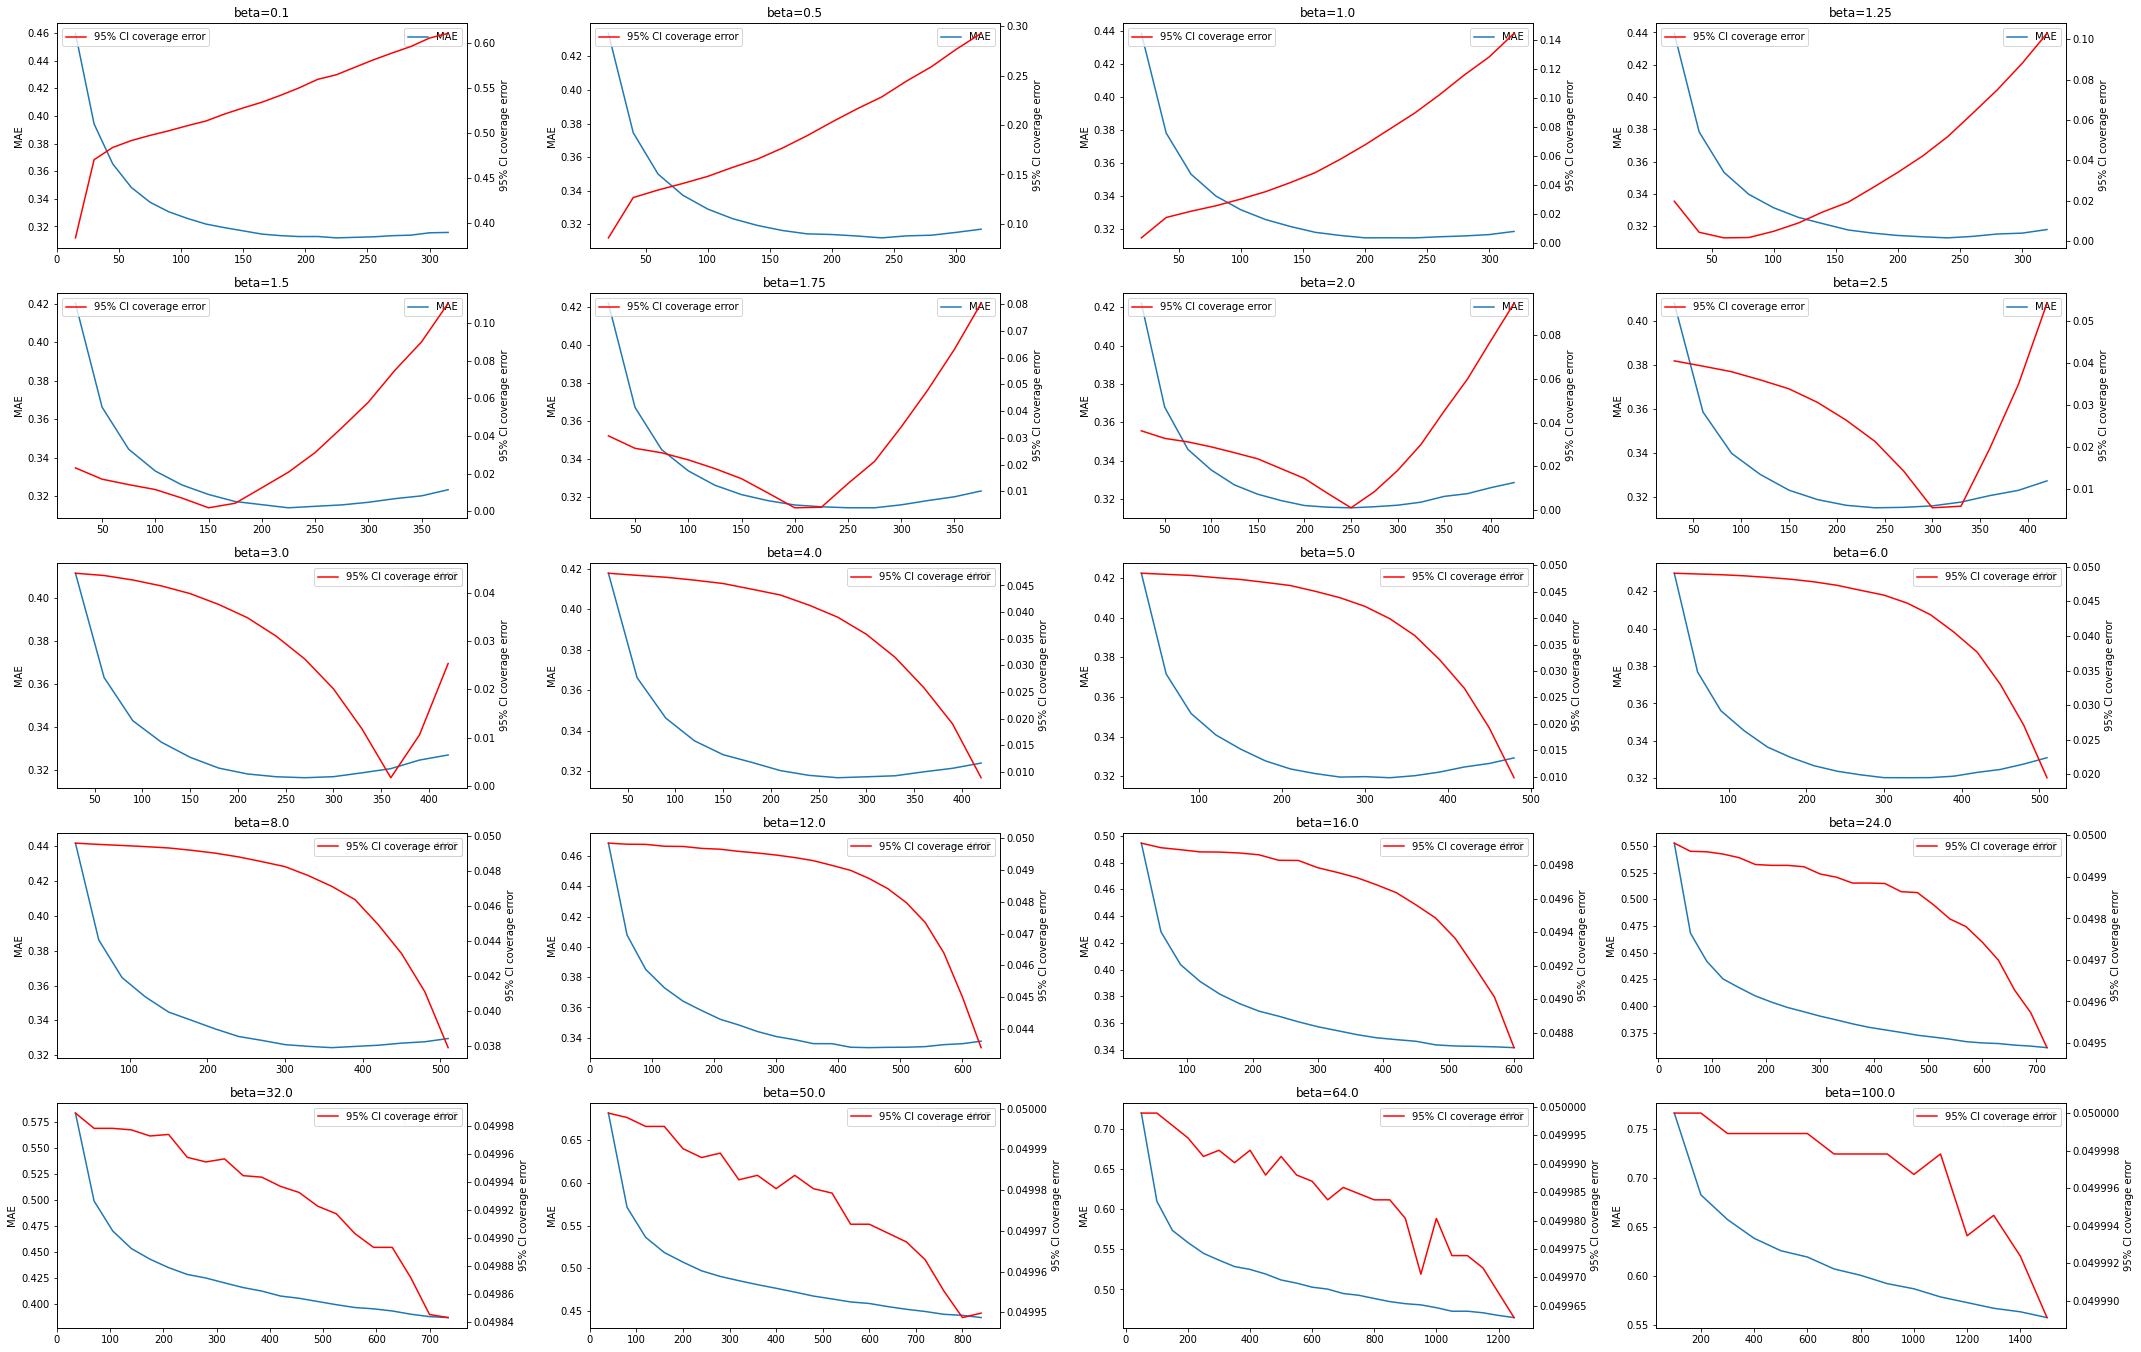

In [36]:
cols = 5
rows = 4
betas = df.beta.unique()
fig, axs = plt.subplots(cols, rows, figsize=(36, 24))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)
for i in range(cols):
    for j in range(rows):
        beta = betas[i * rows + j]
        one_beta = df[df.beta==beta]
        x = one_beta.epoch.values
        y = one_beta.multi_mae.values
        axs[i,j].plot(x,y, label='MAE')
        axs[i,j].set_title('beta=' + str(beta))
        ax2=axs[i,j].twinx()
        y2 = abs(one_beta.prop_95.values - 0.95)
        ax2.plot(x, y2, c='red', label='95% CI coverage error')
        axs[i,j].legend()
        axs[i,j].set_ylabel('MAE')
        ax2.set_ylabel('95% CI coverage error')
        ax2.legend()
plt.savefig('output/beta_and_epochs_coverage_and_mae', facecolor='white')
plt.show()